Summary:
This is an introduction to financial programming with python

Libraries
- Pandas
- Pandas-datareader
- matplotlib
- beautifulsoup4
- sckikit-learn
- mpl_finance

Section 1 - Webscraping
- analyze data from just one company
- collect and combine data from the entire S&P 500 companies
- analyze relationships between companies
- formulate trading strategies
- analyze trading strategies

Section 2 - Quantopian
- Algorithmic trading
- Orders and Leverage
- Schedule Function
- Research
- Pipeline
- Analyzing alpha factors and Alphalens
- Backtesting Alpha factors
- Analyzing backtest with pyfolio
- strategizing
- finding more alpha factors
- combining alphas
- portfolio optimization API

Section 3 - Zipline
- Local backtesting and finance with Python
- visualizing strategy metrics
- custom data panel
- trading custom markets (bitcoin example)

### Getting Share Price Data
- Collect and analyze share price data of the electric car company TESLA. Using pandas datareader and collecting from the financial website

In [2]:
import warnings
warnings.filterwarnings('ignore') # hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import yfinance as yf

start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()
df = yf.download('TSLA', start=start, end=end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df.columns = df.columns.droplevel(1) if isinstance(df.columns, pd.MultiIndex) else df.columns

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [3]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-11-27,332.890015,332.890015,342.549988,326.589996,341.799988,57896400
2024-11-29,345.160004,345.160004,345.450012,334.649994,336.079987,37167600
2024-12-02,357.089996,357.089996,360.000000,351.149994,352.380005,77986500
2024-12-03,351.420013,351.420013,355.690002,348.200012,351.799988,58267200
2024-12-04,357.929993,357.929993,358.100006,348.600006,353.000000,50610300


Visualize TESLA Close Prices

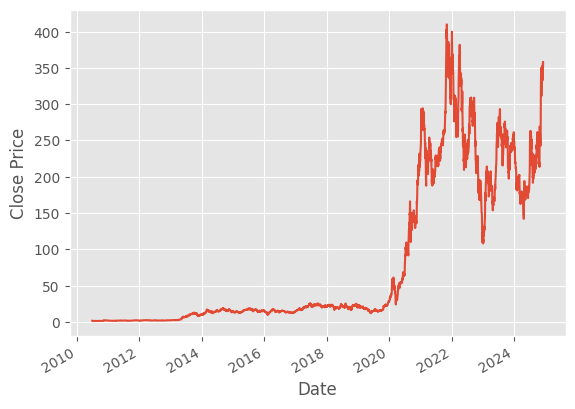

In [4]:
# visualize the close prices
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
df.Close.plot()
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

Basic Stock Data Manipulation

Moving Averages
Here we create moving averages of tesla share price data


Here we will create and visualize the 100 day moving average, and visualize it along with the close price and volume data.

In [5]:
# create, and add 100 day moving average to dataframe
df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,100ma
Date,,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500,1.592667
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500,1.590667
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000,1.548445
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000,1.481333
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500,1.399867


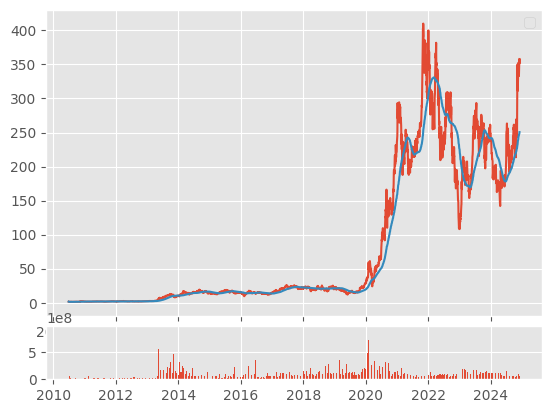

In [6]:
# visualize the close prices, 100ma and volume
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df.Close)
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df.Volume, label='volume')

ax1.legend()
plt.show()

In [7]:
# resample to get open-high-low-close (OHLC) on every  10 days of data
df_ohlc = df.Close.resample('10D').ohlc()
df_volume = df.Volume.resample('10D').sum()

df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,1.592667,1.592667,1.053333,1.164000
2010-07-09,1.160000,1.376000,1.136667,1.376000
2010-07-19,1.460667,1.460667,1.348000,1.381333
2010-07-29,1.356667,1.463333,1.306000,1.306000
2010-08-08,1.306667,1.306667,1.173333,1.276667


`matplotlib.finance` offers some useful functions for plotting candlesticks

In [9]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

The function `candlestick_ohlc` requires a special type of data known as mdate. So next step is to convert dates into mdates

In [10]:
df_ohlc.reset_index(inplace=True)
df_ohlc.Date = df_ohlc.Date.map(mdates.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,14789.0,1.592667,1.592667,1.053333,1.164000
1,14799.0,1.160000,1.376000,1.136667,1.376000
2,14809.0,1.460667,1.460667,1.348000,1.381333
3,14819.0,1.356667,1.463333,1.306000,1.306000
4,14829.0,1.306667,1.306667,1.173333,1.276667


Having created our open high low close data, it is able to be used to create candle sticks.

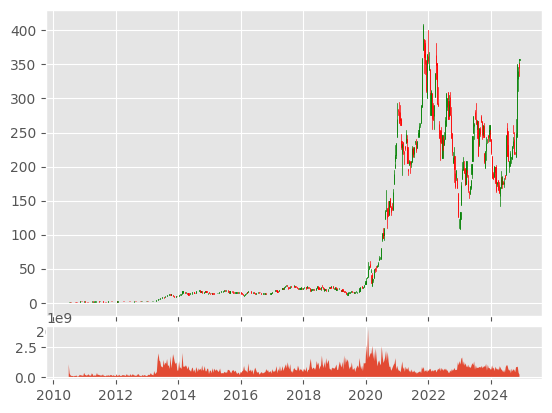

In [11]:
# create and visualize candle stick charts
ax1 = plt.subplot2grid((6,1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()

Basically this candle stick graphs helps to condense price direction and open-high-low-close data all in just one graph. 
Also, plotted volume in the lower subplot to condense even more information in just one plot.